# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson

### (1) Definition of unified probability intervals for assumed probability density function

Assuming Poisson probability distribution with background (!)

In [4]:
# Return unified interval corresponsing to given CL

# Fixed background level

bg = 3.0

def problim(mean,cl):
    
# Find sum range required for % level precision

    prec = 0.01*(1-cl)

    nmin = poisson.isf(1-prec,bg+mean)
    nmax = poisson.isf(prec,bg+mean)

# Considered interval candidates

    ntab = np.linspace(nmin,nmax,int(nmax-nmin+1.5))
    ptab = poisson.pmf(ntab,bg+mean)

# Highest likelihood for each candidate

    mbest = (ntab - bg) * (ntab > bg)
    pbest = poisson.pmf(ntab,bg+mbest)
    
# Sort candidates according to the probability ratio

    prat = ptab/pbest
    
    isort= np.argsort(prat)

    nlo=nmax
    nhi=nmin
    psum=0
    
    for ip in reversed(isort):
        psum += ptab[ip]
        if(nlo>ntab[ip]): nlo=ntab[ip]
        if(nhi<ntab[ip]): nhi=ntab[ip]
#        print(ip,psum,ntab[ip],ptab[ip],mbest[ip],pbest[ip],prat[ip])
        if(psum>cl): break
        
    return nlo,nhi

# Help function to check coverage

def probsum(mean,n1,n2):
    nn = np.linspace(n1,n2,int(n2-n1+1.5))
    pn=poisson.pmf(nn,bg+mean)
    return np.sum(pn)


### (2) Define set of hypothesis

In [11]:
# Considered values of true mean

# vmean = np.linspace(0.5,15.,30)
# vmean = np.linspace(0.1,15.,150)
vmean = np.linspace(0.02,15.,750)

CL = 0.90            # Two sided! 

# Upper an lower edges of x probability intervals

vlow = np.empty(vmean.size)
vhig = np.empty(vmean.size)

for im in range(vmean.size):
    vlow[im],vhig[im] = problim(vmean[im],CL)


### (3)  Print interval information

In [12]:
print("\nProbability intervals for x:")

print("\n  true mean     n_low     n_high    CL_low      CL_high     CL")

for im in range(vmean.size) :
    lcl = 1 - probsum(vmean[im],0,vlow[im]-1)
    hcl = probsum(vmean[im],0,vhig[im])
    tcl = probsum(vmean[im],vlow[im],vhig[im])
    
# For test
# hcl = 1 - probsum(vmean[im],0,vlow[im])
# lcl = probsum(vmean[im],0,vhig[im]-1)

    print ("%10.3f   %8.3f  %8.3f     %8.6f    %8.6f     %8.6f" % (vmean[im],vlow[im],vhig[im],lcl,hcl,tcl))



Probability intervals for x:

  true mean     n_low     n_high    CL_low      CL_high     CL
     0.020      0.000     5.000     1.000000    0.914052     0.914052
     0.040      0.000     5.000     1.000000    0.911996     0.911996
     0.060      0.000     5.000     1.000000    0.909912     0.909912
     0.080      0.000     5.000     1.000000    0.907803     0.907803
     0.100      0.000     5.000     1.000000    0.905666     0.905666
     0.120      0.000     5.000     1.000000    0.903503     0.903503
     0.140      0.000     5.000     1.000000    0.901315     0.901315
     0.160      0.000     6.000     1.000000    0.957770     0.957770
     0.180      0.000     6.000     1.000000    0.956586     0.956586
     0.200      0.000     6.000     1.000000    0.955381     0.955381
     0.220      0.000     6.000     1.000000    0.954154     0.954154
     0.240      0.000     6.000     1.000000    0.952907     0.952907
     0.260      0.000     6.000     1.000000    0.951637     0.951

### (4) Draw probability intervals

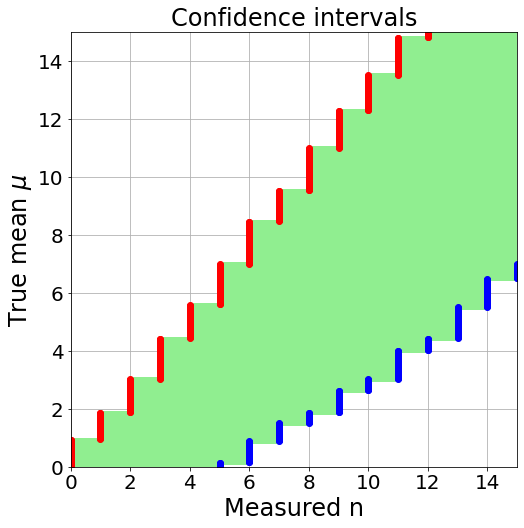

In [13]:
# Frame range

Xmin=0
Xmax=15
Ymin=0
Ymax=15

plt.figure(figsize=(8, 8))

# Intervals

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

# Limits 

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')


plt.title("Confidence intervals",size=24)
plt.xlabel("Measured n",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_poisson_interval3_1.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [14]:
Xm = 6

# Look for limit point in the probability interval tables

iuh = np.argmax(Xm <= vhig)
iul = np.argmax(Xm < vlow)

ul=vmean[iul-1]
print('Upper limit : %.4f' % (ul))

ll = vmean[iuh]
print('Lower limit : %.4f' % (ll))

Upper limit : 8.4600
Lower limit : 0.1600


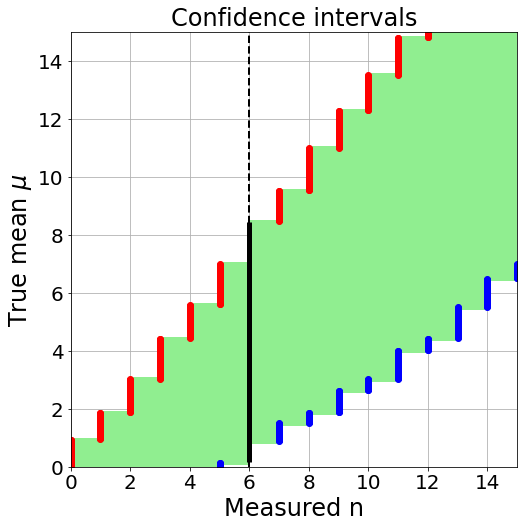

In [15]:
# Frame range

Xmin=0
Xmax=15
Ymin=0
Ymax=15

plt.figure(figsize=(8, 8))

# Intervals

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

# Limits 

plt.plot(vlow[vlow!=Xm],vmean[vlow!=Xm],'o',color='red')
plt.plot(vhig[vhig!=Xm],vmean[vhig!=Xm],'o',color='blue')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,ll,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured n",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_poisson_interval3_2.png'
plt.savefig(fname)
